Cr. https://www.kaggle.com/code/lazer999/spaceship-titanic-top-6-for-beginners

### Importing Libraries

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading the Data

In [239]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Columns Description**
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Explore Data

In [240]:
r1,c1 = df_train.shape
print('The training data has {} rows and {} columns'.format(r1,c1))
r2,c2 = df_test.shape
print('The validation data has {} rows and {} columns'.format(r2,c2))

The training data has 8693 rows and 14 columns
The validation data has 4277 rows and 13 columns


In [241]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [242]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [243]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


### Missing values

In [244]:
print('MISSING VALUES IN TRAINING DATASET:')
print(df_train.isna().sum().nlargest(c1))
print('')
print('MISSING VALUES IN VALIDATION DATASET:')
print(df_test.isna().sum().nlargest(c2))

MISSING VALUES IN TRAINING DATASET:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

MISSING VALUES IN VALIDATION DATASET:
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [245]:
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

### C Null Replacement

In [246]:
df_train["HomePlanet"] = df_train["HomePlanet"].fillna(df_train["HomePlanet"].mode()[0]) 
df_train["CryoSleep"] = df_train["CryoSleep"].fillna(df_train["CryoSleep"].mode()[0]) 
df_train["Destination"] = df_train["Destination"].fillna(df_train["Destination"].mode()[0]) 
df_train["VIP"] = df_train["VIP"].fillna(df_train["VIP"].mode()[0]) 

df_train["RoomService"] = df_train["RoomService"].fillna(df_train["RoomService"].mode()[0]) 
df_train["FoodCourt"] = df_train["FoodCourt"].fillna(df_train["FoodCourt"].mode()[0]) 
df_train["ShoppingMall"] = df_train["ShoppingMall"].fillna(df_train["ShoppingMall"].mode()[0]) 
df_train["Spa"] = df_train["Spa"].fillna(df_train["Spa"].mode()[0]) 
df_train["VRDeck"] = df_train["VRDeck"].fillna(df_train["VRDeck"].mode()[0]) 

df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
df_train['Cabin'] =df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])

In [247]:
df_test["HomePlanet"] = df_test["HomePlanet"].fillna(df_test["HomePlanet"].mode()[0]) 
df_test["CryoSleep"] = df_test["CryoSleep"].fillna(df_test["CryoSleep"].mode()[0]) 
df_test["Destination"] = df_test["Destination"].fillna(df_test["Destination"].mode()[0]) 
df_test["VIP"] = df_test["VIP"].fillna(df_test["VIP"].mode()[0]) 

df_test["RoomService"] = df_test["RoomService"].fillna(df_test["RoomService"].mode()[0]) 
df_test["FoodCourt"] = df_test["FoodCourt"].fillna(df_test["FoodCourt"].mode()[0]) 
df_test["ShoppingMall"] = df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].mode()[0]) 
df_test["Spa"] = df_test["Spa"].fillna(df_test["Spa"].mode()[0]) 
df_test["VRDeck"] = df_test["VRDeck"].fillna(df_test["VRDeck"].mode()[0]) 

df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())
df_test['Cabin'] =df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])

In [248]:
print('MISSING VALUES IN TRAINING DATASET:')
print(df_train.isna().sum().nlargest(c1))
print('')
print('MISSING VALUES IN VALIDATION DATASET:')
print(df_test.isna().sum().nlargest(c2))

MISSING VALUES IN TRAINING DATASET:
Name            200
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

MISSING VALUES IN VALIDATION DATASET:
Name            94
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64


In [249]:
# df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mode()[0])
# df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

# df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
# df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())

# df_train['VIP'] =df_train['VIP'].fillna(False)
# df_test['VIP'] =df_test['VIP'].fillna(False)

# df_train['HomePlanet'] =df_train['HomePlanet'].fillna('Mars')
# df_test['HomePlanet'] =df_test['HomePlanet'].fillna('Mars')

# df_train['Destination']=df_train['Destination'].fillna("PSO J318.5-22")
# df_test['Destination']=df_test['Destination'].fillna("PSO J318.5-22")

# df_train['CryoSleep'] =df_train['CryoSleep'].fillna(False)
# df_test['CryoSleep'] =df_test['CryoSleep'].fillna(False)

# df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
# df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

## Exploration and Visualization

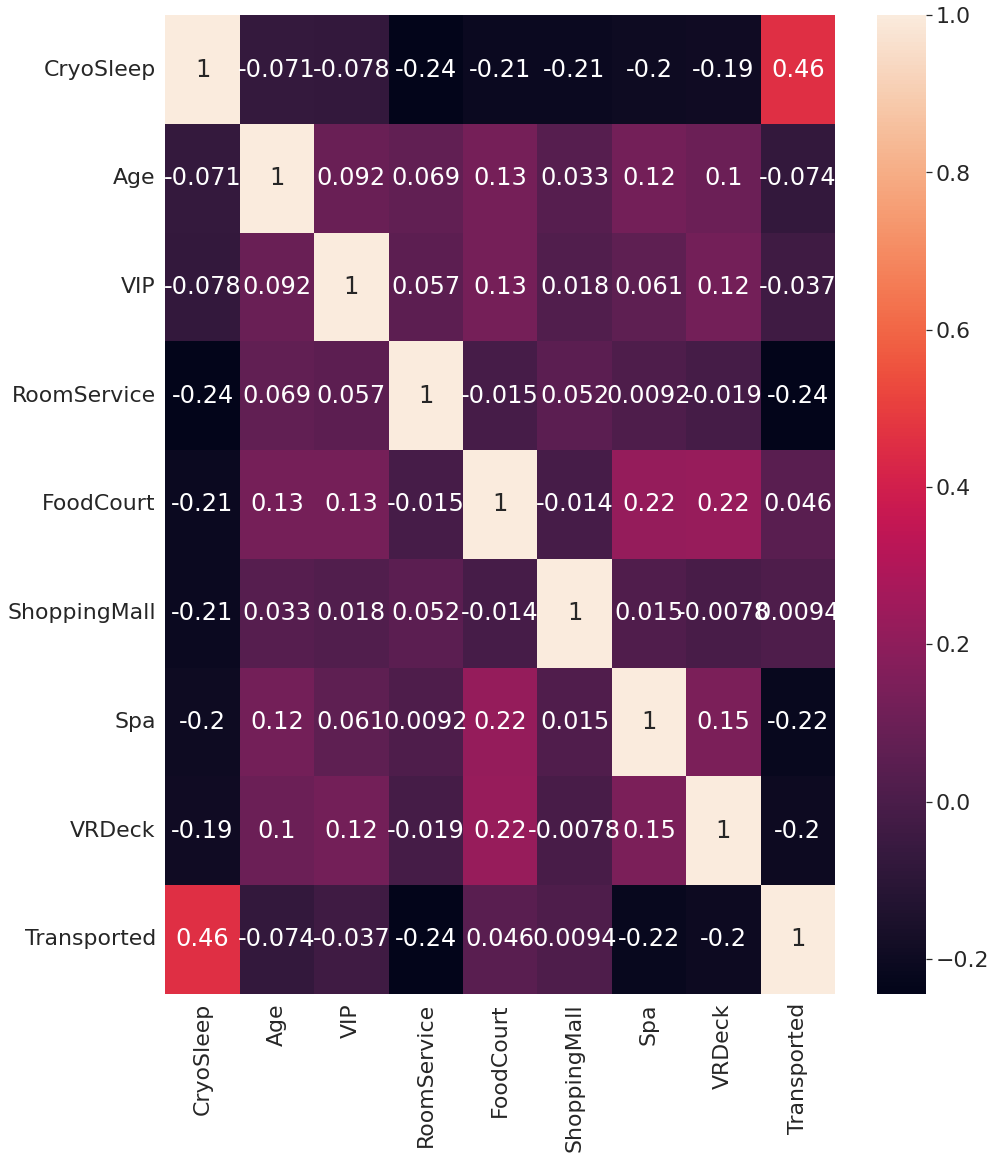

In [250]:
plt.figure(figsize=(15,18))
sns.heatmap(df_train.corr(), annot=True);

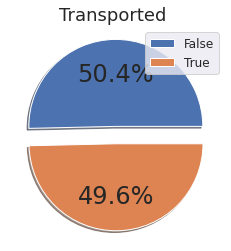

In [251]:
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('Transported ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

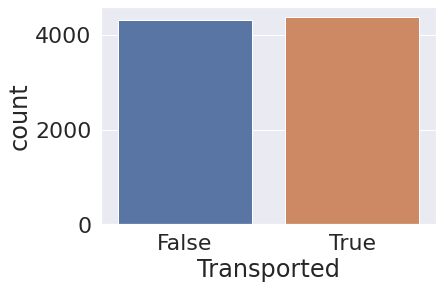

In [252]:
sns.countplot(df_train.Transported);

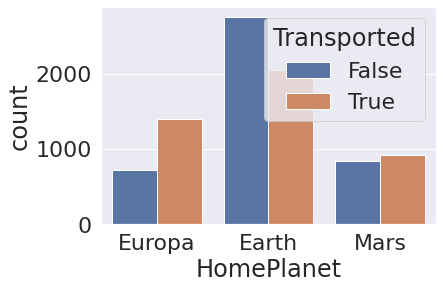

In [253]:
sns.countplot(df_train.HomePlanet,hue=df_train.Transported);

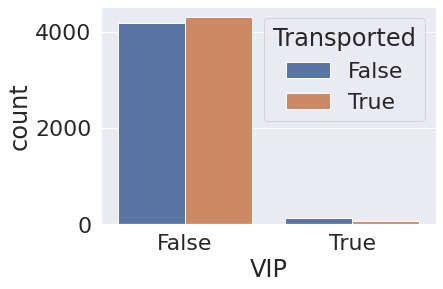

In [254]:
sns.countplot(df_train.VIP,hue=df_train.Transported);

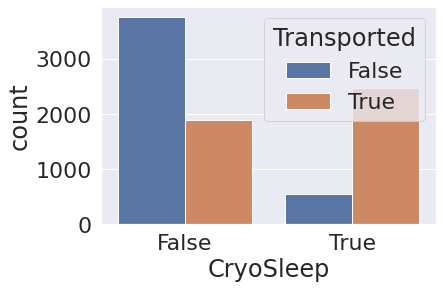

In [255]:
sns.countplot(df_train.CryoSleep,hue=df_train.Transported);

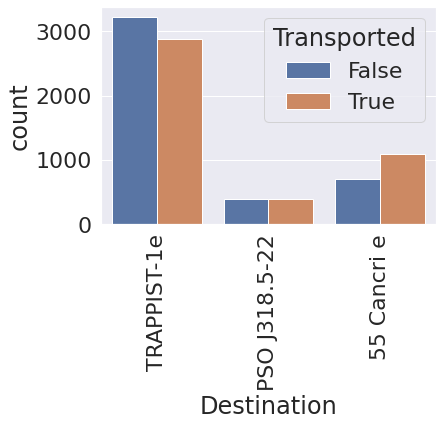

In [256]:
sns.countplot(df_train.Destination,hue=df_train.Transported)
plt.xticks(rotation=90);

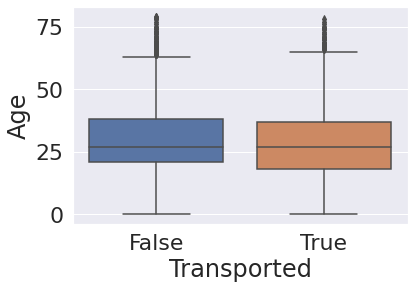

In [257]:
sns.boxplot(y=df_train.Age,x=df_train.Transported);

### Splitting Cabin Column

In [258]:
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

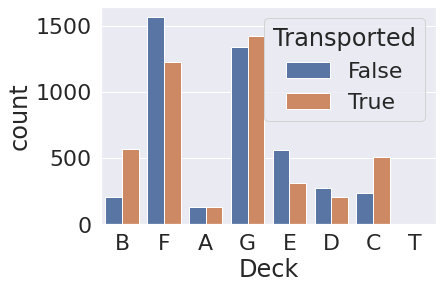

In [259]:
sns.countplot(df_train.Deck,hue=df_train.Transported);

In [260]:
# plt.figure(figsize=(10,5))
# sns.histplot(data=df_train, x='Num', hue='Transported',bins=14);

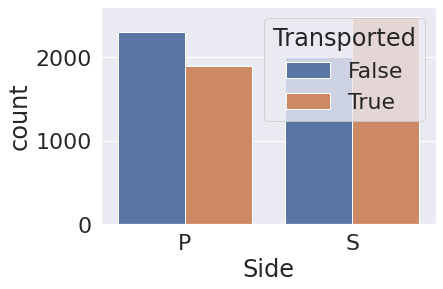

In [261]:
sns.countplot(df_train.Side,hue=df_train.Transported);

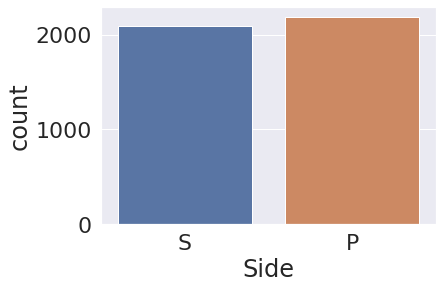

In [262]:
sns.countplot(df_test.Side);

### Feature Engineering

In [263]:
df_train['total_spent']= df_train['RoomService']+ df_train['FoodCourt']+ df_train['ShoppingMall']+ df_train['Spa']+ df_train['VRDeck']
df_test['total_spent']=df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck']

In [264]:
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

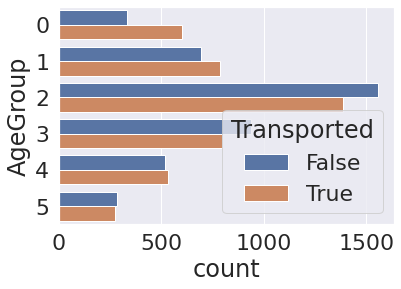

In [265]:
sns.countplot(y=df_train['AgeGroup'],hue=df_train['Transported']);

## Pre processing for Modeling

### Encoding

In [266]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [267]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0,3
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0,2
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0,5
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0,3
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0,1


### Dropping Columns

In [268]:
df_train= df_train.drop(['Name','Cabin'],axis=1)
df_test= df_test.drop(['Name','Cabin'],axis=1)

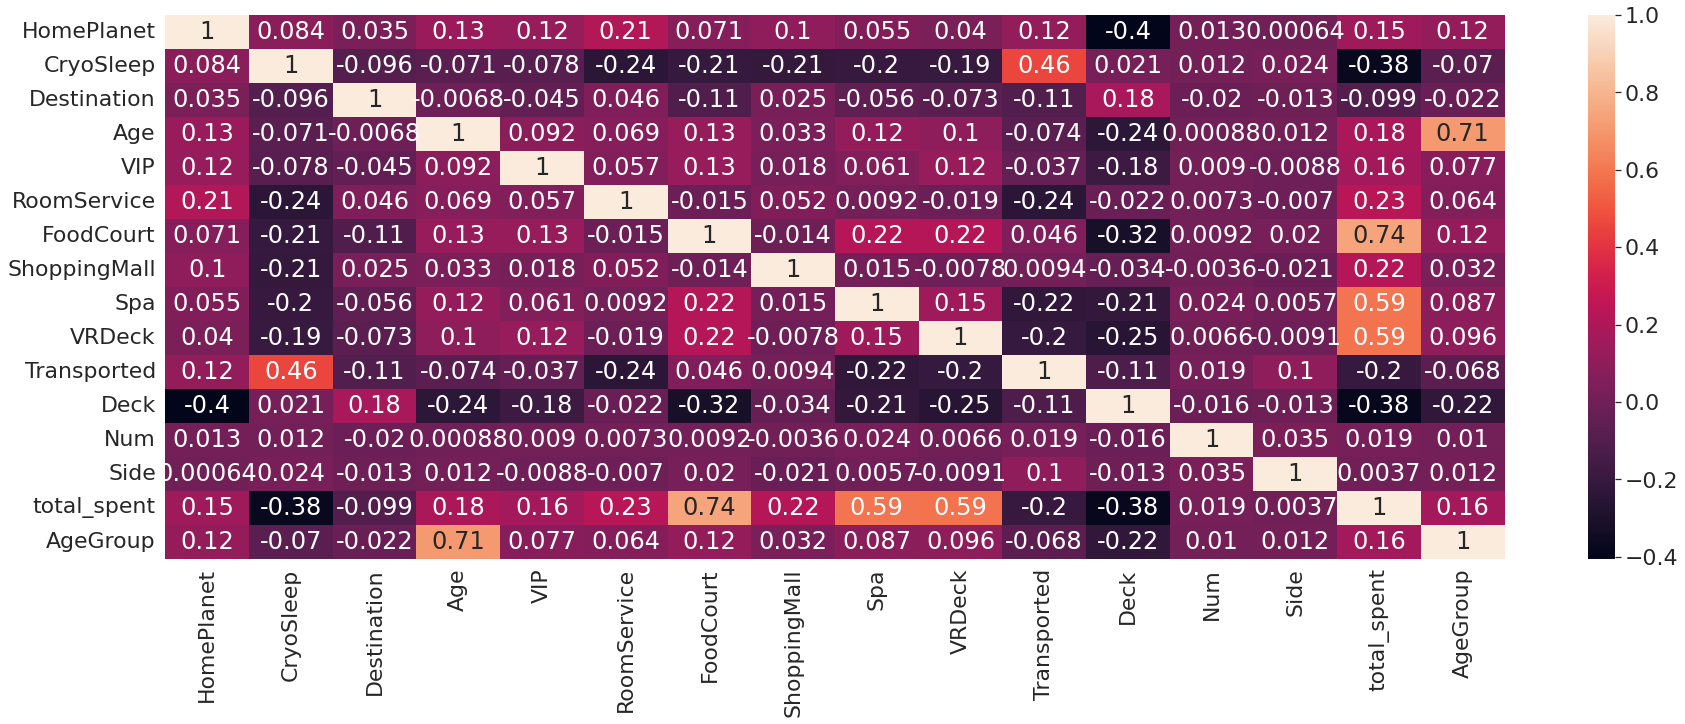

In [269]:
plt.figure(figsize=(30,10))
sns.heatmap(df_train.corr(), annot=True);

In [270]:
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})

In [271]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [272]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'total_spent', 'AgeGroup'],
      dtype='object')

### Splitting Columns

In [273]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

### Modeling

In [274]:
#Cat Boost 😾
model=CatBoostClassifier(iterations=1500, eval_metric='Accuracy',verbose=0)
model.fit(X_train,y_train)

y_pred=model.predict(X_val)
print(accuracy_score(y_val.values,y_pred))

0.8077276908923643


In [275]:
#XGboost
model=XGBClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_val)
print(accuracy_score(y_val.values,y_pred))

0.8031278748850046


In [276]:
#Gradient Boosting
model=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)
model.fit(X_train,y_train)

y_pred=model.predict(X_val)
print(accuracy_score(y_val.values,y_pred))

0.8008279668813247


In [277]:
#Random Forest
model=random_forest = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

y_pred=model.predict(X_val)
print(accuracy_score(y_val.values,y_pred))

0.8008279668813247


### Cat wins!!! 😼

## Prediction and Submission 

In [278]:
model=CatBoostClassifier(iterations=1500, eval_metric='Accuracy',verbose=0)
model.fit(X, y)
y_pred = model.predict(df_test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [279]:
sub.to_csv('submission.csv')